In [1]:
from Chapter5.DistanceMetrics import InstanceDistanceMetrics
from Chapter5.DistanceMetrics import PersonDistanceMetricsNoOrdering
from Chapter5.DistanceMetrics import PersonDistanceMetricsOrdering
from Chapter5.Clustering import NonHierarchicalClustering
from Chapter5.Clustering import HierarchicalClustering
import util.util as util
from util.VisualizeDataset import VisualizeDataset

import sys
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import argparse

In [2]:
dataset_path = 'data/raw_data/processed_data/ch5__own_dataset.csv'
dataset = pd.read_csv(dataset_path, index_col=0)
dataset

,acc_Acceleration x (m/s^2),acc_Acceleration y (m/s^2),acc_Acceleration z (m/s^2),gyr_Gyroscope x (rad/s),gyr_Gyroscope y (rad/s),gyr_Gyroscope z (rad/s),lux_Illuminance (lx),loc_Latitude (°),loc_Longitude (°),loc_Velocity (m/s),mag_Magnetic field x (µT),mag_Magnetic field y (µT),mag_Magnetic field z (µT),labelbike,labeldance,labeldesk,labelrun,labelsit,labelwalki,labelwalko
2021-06-05 08:36:26.816535552,0.036547,-0.413988,9.933076,0.000925,0.001020,0.000860,NaN,52.334314,4.866964,0.0,-42.480555,-29.510528,-53.944618,0,0,1,0,0,0,0
2021-06-05 08:36:27.066535552,0.038458,-0.410600,9.926204,0.001178,0.000995,0.000796,NaN,NaN,NaN,NaN,-42.042138,-29.635504,-54.179348,0,0,1,0,0,0,0
2021-06-05 08:36:27.316535552,0.040394,-0.413093,9.926906,0.001111,0.000943,0.000502,NaN,NaN,NaN,NaN,-42.356174,-29.556420,-54.101409,0,0,1,0,0,0,0
2021-06-05 08:36:27.566535552,0.037950,-0.412318,9.926228,0.001102,0.000940,0.000633,NaN,NaN,NaN,NaN,-42.442798,-29.204040,-54.113833,0,0,1,0,0,0,0
2021-06-05 08:36:27.816535552,0.034974,-0.409512,9.931890,0.001243,0.001234,0.000796,NaN,NaN,NaN,NaN,-42.515800,-29.500013,-54.508421,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-05 09:54:09.316535552,-1.206271,-2.998419,-6.653096,-1.909578,-0.268146,0.427650,NaN,NaN,NaN,NaN,16.972640,28.263506,39.380895,1,0,0,0,0,0,0
2021-06-05 09:54:09.566535552,-0.339301,-3.701383,-6.518320,2.835989,0.443934,-0.038863,NaN,NaN,NaN,NaN,17.563350,31.381466,35.527515,1,0,0,0,0,0,0
2021-06-05 09:54:09.816535552,-0.247886,-11.119357,-8.390665,0.886565,-0.109226,0.003588,NaN,NaN,NaN,NaN,18.865706,39.960369,10.103960,1,0,0,0,0,0,0
2021-06-05 09:54:10.066535552,-0.393865,-8.937173,-7.247199,-2.348488,-0.453024,-0.030903,NaN,NaN,NaN,NaN,15.334604,35.668764,20.007892,1,0,0,0,0,0,0


In [3]:
DataViz = VisualizeDataset()

clusteringNH = NonHierarchicalClustering()
clusteringH = HierarchicalClustering()

# Acceleration

In [4]:
acc_dataset = dataset.dropna(subset = ['acc_Acceleration x (m/s^2)', 'acc_Acceleration y (m/s^2)', 'acc_Acceleration z (m/s^2)'])

## K-means

In [5]:
k_values = range(2, 10)
silhouette_values = []

for k in k_values:
    print(f'k = {k}')
    dataset_cluster = clusteringNH.k_means_over_instances(copy.deepcopy(
        acc_dataset), ['acc_Acceleration x (m/s^2)', 'acc_Acceleration y (m/s^2)', 'acc_Acceleration z (m/s^2)'], k, 'default', 20, 10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print(f'silhouette = {silhouette_score}')
    silhouette_values.append(silhouette_score)

k = 2
silhouette = 0.600614123531503
k = 3
silhouette = 0.5931541551898986
k = 4
silhouette = 0.5089891060734605
k = 5
silhouette = 0.5261769419890443
k = 6
silhouette = 0.5212119373701838
k = 7
silhouette = 0.5237229679300296
k = 8
silhouette = 0.5420692861054625
k = 9
silhouette = 0.5386376268733689


Figure saved to figures/figure_1.png


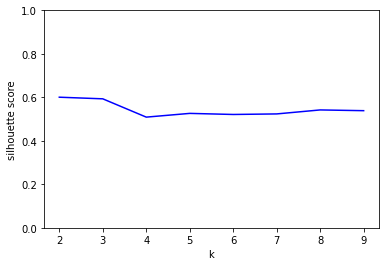

Highest K-Means silhouette score: k = 2


In [6]:
DataViz.plot_xy(x=[k_values], y=[silhouette_values], 
                xlabel='k', ylabel='silhouette score',ylim=[0, 1], line_styles=['b-'])
k = k_values[np.argmax(silhouette_values)]
print(f'Highest K-Means silhouette score: k = {k}')

## Kmediods

In [7]:
k_values = range(2, 10)
silhouette_values = []

for k in k_values:
    print(f'k = {k}')
    dataset_cluster = clusteringNH.k_medoids_over_instances(copy.deepcopy(
        acc_dataset), ['acc_Acceleration x (m/s^2)', 'acc_Acceleration y (m/s^2)', 'acc_Acceleration z (m/s^2)'], k, 'default', 20, n_inits=10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print(f'silhouette = {silhouette_score}')
    silhouette_values.append(silhouette_score)

k = 2
silhouette = 0.5968087341849494
k = 3
silhouette = 0.5572673295288485
k = 4
silhouette = 0.4254020667004557
k = 5
silhouette = 0.4058196233999192
k = 6
silhouette = 0.4745099092140744
k = 7
silhouette = 0.4069564584203798
k = 8
silhouette = 0.40347739970330276
k = 9
silhouette = 0.29030146683215097


Figure saved to figures/figure_2.png


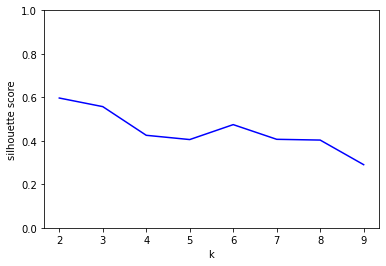

Highest K-Medoids silhouette score: k = 2
Figure saved to figures/figure_3.png


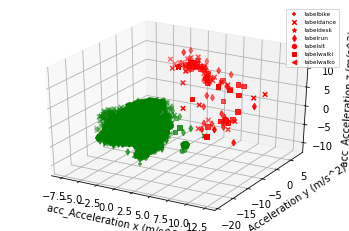

Figure saved to figures/figure_4.png


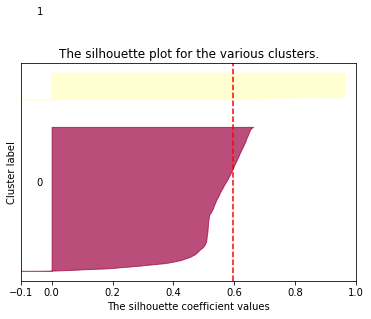

\multirow{2}{*}{ acc_Acceleration x (m/s^2) } & mean  &  0.34 &  -0.76\\
 & std  &  1.43 &  1.76\\
\multirow{2}{*}{ acc_Acceleration y (m/s^2) } & mean  &  -0.35 &  -8.40\\
 & std  &  1.21 &  4.25\\
\multirow{2}{*}{ acc_Acceleration z (m/s^2) } & mean  &  9.64 &  -3.61\\
 & std  &  1.45 &  3.95\\
labelbike  & percentage  &  0.00 \% &  100.00 \%\\
labeldance  & percentage  &  4.00 \% &  96.00 \%\\
labeldesk  & percentage  &  100.00 \% &  0.00 \%\\
labelrun  & percentage  &  1.92 \% &  98.08 \%\\
labelsit  & percentage  &  0.00 \% &  100.00 \%\\
labelwalki  & percentage  &  3.66 \% &  96.34 \%\\
labelwalko  & percentage  &  0.00 \% &  100.00 \%\\


In [8]:
DataViz.plot_xy(x=[k_values], y=[silhouette_values], xlabel='k', ylabel='silhouette score',
                ylim=[0, 1], line_styles=['b-'])

k = k_values[np.argmax(silhouette_values)]
print(f'Highest K-Medoids silhouette score: k = {k}')

dataset_kmed = clusteringNH.k_medoids_over_instances(copy.deepcopy(acc_dataset), 
                                                     ['acc_Acceleration x (m/s^2)', 'acc_Acceleration y (m/s^2)', 'acc_Acceleration z (m/s^2)'], 
                                                     k, 'default', 20, n_inits=50)
DataViz.plot_clusters_3d(dataset_kmed, ['acc_Acceleration x (m/s^2)', 'acc_Acceleration y (m/s^2)', 'acc_Acceleration z (m/s^2)'], 'cluster', ['label'])
DataViz.plot_silhouette(dataset_kmed, 'cluster', 'silhouette')
util.print_latex_statistics_clusters(dataset_kmed, 'cluster', 
                                     ['acc_Acceleration x (m/s^2)', 'acc_Acceleration y (m/s^2)', 'acc_Acceleration z (m/s^2)'], 'label')

## hierarchical

In [9]:
k_values = range(2, 10)
silhouette_values = []

for k in k_values:
    print(f'k = {k}')
    dataset_cluster, l = clusteringH.agglomerative_over_instances(acc_dataset, 
                                                          ['acc_Acceleration x (m/s^2)', 'acc_Acceleration y (m/s^2)', 'acc_Acceleration z (m/s^2)'], 
                                                          k, 'euclidean', 
                                                          link_function='ward')
    silhouette_score = dataset_cluster['silhouette'].mean()
    print(f'silhouette = {silhouette_score}')
    silhouette_values.append(silhouette_score)

k = 2


/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster'] = cluster_assignment
/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['silhouette'] = silhouette_per_inst


silhouette = 0.5952643005238815
k = 3


/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster'] = cluster_assignment
/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['silhouette'] = silhouette_per_inst


silhouette = 0.5916737382199445
k = 4


/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster'] = cluster_assignment
/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['silhouette'] = silhouette_per_inst


silhouette = 0.4495945636367112
k = 5


/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster'] = cluster_assignment
/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['silhouette'] = silhouette_per_inst


silhouette = 0.4866037019789448
k = 6


/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster'] = cluster_assignment
/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['silhouette'] = silhouette_per_inst


silhouette = 0.4833837467717718
k = 7


/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster'] = cluster_assignment
/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['silhouette'] = silhouette_per_inst


silhouette = 0.4809843444932612
k = 8


/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster'] = cluster_assignment
/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['silhouette'] = silhouette_per_inst


silhouette = 0.511577722821265
k = 9


/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster'] = cluster_assignment


silhouette = 0.5177175159489604


/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['silhouette'] = silhouette_per_inst


Figure saved to figures/figure_5.png


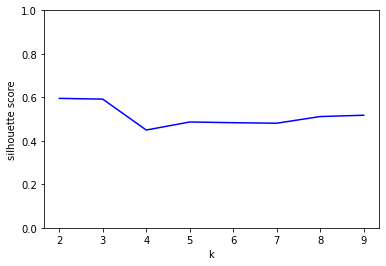

In [10]:
if k == k_values[0]:
        DataViz.plot_dendrogram(acc_dataset, l)
DataViz.plot_xy(x=[k_values], y=[silhouette_values], xlabel='k', ylabel='silhouette score',
                ylim=[0, 1], line_styles=['b-'])

# Gyroscope

In [11]:
gyr_dataset = dataset.dropna(subset = ['gyr_Gyroscope x (rad/s)', 'gyr_Gyroscope y (rad/s)', 'gyr_Gyroscope z (rad/s)'])
gyr_dataset

,acc_Acceleration x (m/s^2),acc_Acceleration y (m/s^2),acc_Acceleration z (m/s^2),gyr_Gyroscope x (rad/s),gyr_Gyroscope y (rad/s),gyr_Gyroscope z (rad/s),lux_Illuminance (lx),loc_Latitude (°),loc_Longitude (°),loc_Velocity (m/s),mag_Magnetic field x (µT),mag_Magnetic field y (µT),mag_Magnetic field z (µT),labelbike,labeldance,labeldesk,labelrun,labelsit,labelwalki,labelwalko
2021-06-05 08:36:26.816535552,0.036547,-0.413988,9.933076,0.000925,0.001020,0.000860,NaN,52.334314,4.866964,0.0,-42.480555,-29.510528,-53.944618,0,0,1,0,0,0,0
2021-06-05 08:36:27.066535552,0.038458,-0.410600,9.926204,0.001178,0.000995,0.000796,NaN,NaN,NaN,NaN,-42.042138,-29.635504,-54.179348,0,0,1,0,0,0,0
2021-06-05 08:36:27.316535552,0.040394,-0.413093,9.926906,0.001111,0.000943,0.000502,NaN,NaN,NaN,NaN,-42.356174,-29.556420,-54.101409,0,0,1,0,0,0,0
2021-06-05 08:36:27.566535552,0.037950,-0.412318,9.926228,0.001102,0.000940,0.000633,NaN,NaN,NaN,NaN,-42.442798,-29.204040,-54.113833,0,0,1,0,0,0,0
2021-06-05 08:36:27.816535552,0.034974,-0.409512,9.931890,0.001243,0.001234,0.000796,NaN,NaN,NaN,NaN,-42.515800,-29.500013,-54.508421,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-05 09:54:09.316535552,-1.206271,-2.998419,-6.653096,-1.909578,-0.268146,0.427650,NaN,NaN,NaN,NaN,16.972640,28.263506,39.380895,1,0,0,0,0,0,0
2021-06-05 09:54:09.566535552,-0.339301,-3.701383,-6.518320,2.835989,0.443934,-0.038863,NaN,NaN,NaN,NaN,17.563350,31.381466,35.527515,1,0,0,0,0,0,0
2021-06-05 09:54:09.816535552,-0.247886,-11.119357,-8.390665,0.886565,-0.109226,0.003588,NaN,NaN,NaN,NaN,18.865706,39.960369,10.103960,1,0,0,0,0,0,0
2021-06-05 09:54:10.066535552,-0.393865,-8.937173,-7.247199,-2.348488,-0.453024,-0.030903,NaN,NaN,NaN,NaN,15.334604,35.668764,20.007892,1,0,0,0,0,0,0


## K-means

In [12]:
k_values = range(2, 10)
silhouette_values = []

for k in k_values:
    print(f'k = {k}')
    dataset_cluster = clusteringNH.k_means_over_instances(copy.deepcopy(
        gyr_dataset), ['gyr_Gyroscope x (rad/s)', 'gyr_Gyroscope y (rad/s)', 'gyr_Gyroscope z (rad/s)'], k, 'default', 20, 10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print(f'silhouette = {silhouette_score}')
    silhouette_values.append(silhouette_score)

k = 2
silhouette = 0.5542354715741715
k = 3
silhouette = 0.5579795915058184
k = 4
silhouette = 0.49490424223221235
k = 5
silhouette = 0.48838435848781736
k = 6
silhouette = 0.5015561112237682
k = 7
silhouette = 0.507872227287337
k = 8
silhouette = 0.47068611604009397
k = 9
silhouette = 0.4716640855815021


Figure saved to figures/figure_6.png


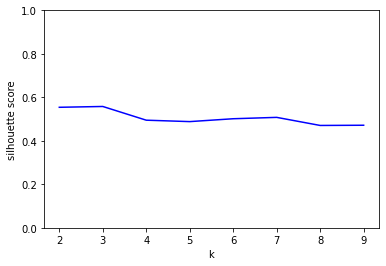

Highest K-Means silhouette score: k = 3


In [13]:
DataViz.plot_xy(x=[k_values], y=[silhouette_values], 
                xlabel='k', ylabel='silhouette score',ylim=[0, 1], line_styles=['b-'])
k = k_values[np.argmax(silhouette_values)]
print(f'Highest K-Means silhouette score: k = {k}')

## Kmediods

In [14]:
k_values = range(2, 10)
silhouette_values = []

for k in k_values:
    print(f'k = {k}')
    dataset_cluster = clusteringNH.k_medoids_over_instances(copy.deepcopy(
        gyr_dataset), ['gyr_Gyroscope x (rad/s)', 'gyr_Gyroscope y (rad/s)', 'gyr_Gyroscope z (rad/s)'], k, 'default', 20, n_inits=10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print(f'silhouette = {silhouette_score}')
    silhouette_values.append(silhouette_score)

k = 2
silhouette = 0.5521304921340837
k = 3
silhouette = 0.5140620944587609
k = 4
silhouette = 0.36443897784000584
k = 5
silhouette = 0.35398176283884714
k = 6
silhouette = 0.37726038052612687
k = 7
silhouette = 0.32887133425938514
k = 8
silhouette = 0.3671828997775007
k = 9
silhouette = 0.35791369635104314


Figure saved to figures/figure_7.png


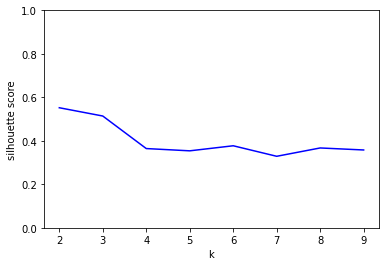

Highest K-Medoids silhouette score: k = 2
Figure saved to figures/figure_8.png


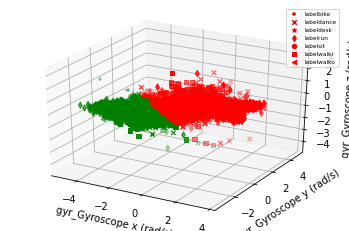

Figure saved to figures/figure_9.png


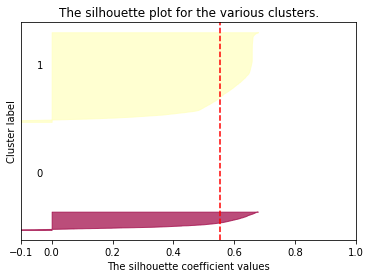

\multirow{2}{*}{ gyr_Gyroscope x (rad/s) } & mean  &  0.46 &  -2.31\\
 & std  &  1.00 &  1.03\\
\multirow{2}{*}{ gyr_Gyroscope y (rad/s) } & mean  &  0.33 &  -1.08\\
 & std  &  0.69 &  0.59\\
\multirow{2}{*}{ gyr_Gyroscope z (rad/s) } & mean  &  0.02 &  -0.22\\
 & std  &  0.33 &  0.38\\
labelbike  & percentage  &  76.10 \% &  23.90 \%\\
labeldance  & percentage  &  94.75 \% &  5.25 \%\\
labeldesk  & percentage  &  100.00 \% &  0.00 \%\\
labelrun  & percentage  &  65.86 \% &  34.14 \%\\
labelsit  & percentage  &  100.00 \% &  0.00 \%\\
labelwalki  & percentage  &  78.43 \% &  21.57 \%\\
labelwalko  & percentage  &  66.11 \% &  33.89 \%\\


In [15]:
DataViz.plot_xy(x=[k_values], y=[silhouette_values], xlabel='k', ylabel='silhouette score',
                ylim=[0, 1], line_styles=['b-'])

k = k_values[np.argmax(silhouette_values)]
print(f'Highest K-Medoids silhouette score: k = {k}')

dataset_kmed = clusteringNH.k_medoids_over_instances(copy.deepcopy(gyr_dataset), 
                                                     ['gyr_Gyroscope x (rad/s)', 'gyr_Gyroscope y (rad/s)', 'gyr_Gyroscope z (rad/s)'], 
                                                     k, 'default', 20, n_inits=50)
DataViz.plot_clusters_3d(dataset_kmed, ['gyr_Gyroscope x (rad/s)', 'gyr_Gyroscope y (rad/s)', 'gyr_Gyroscope z (rad/s)'], 'cluster', ['label'])
DataViz.plot_silhouette(dataset_kmed, 'cluster', 'silhouette')
util.print_latex_statistics_clusters(dataset_kmed, 'cluster', 
                                     ['gyr_Gyroscope x (rad/s)', 'gyr_Gyroscope y (rad/s)', 'gyr_Gyroscope z (rad/s)'], 'label')

## hierarchical

In [16]:
k_values = range(2, 10)
silhouette_values = []

for k in k_values:
    print(f'k = {k}')
    dataset_cluster, l = clusteringH.agglomerative_over_instances(gyr_dataset, 
                                                          ['gyr_Gyroscope x (rad/s)', 'gyr_Gyroscope y (rad/s)', 'gyr_Gyroscope z (rad/s)'], 
                                                          k, 'euclidean', 
                                                          link_function='ward')
    silhouette_score = dataset_cluster['silhouette'].mean()
    print(f'silhouette = {silhouette_score}')
    silhouette_values.append(silhouette_score)

k = 2


/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster'] = cluster_assignment
/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['silhouette'] = silhouette_per_inst


silhouette = 0.5717373980181472
k = 3


/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster'] = cluster_assignment
/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['silhouette'] = silhouette_per_inst


silhouette = 0.53896434476155
k = 4


/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster'] = cluster_assignment
/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['silhouette'] = silhouette_per_inst


silhouette = 0.4992407095494917
k = 5


/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster'] = cluster_assignment
/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['silhouette'] = silhouette_per_inst


silhouette = 0.45056660640913815
k = 6


/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster'] = cluster_assignment
/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['silhouette'] = silhouette_per_inst


silhouette = 0.4379098908038612
k = 7


/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster'] = cluster_assignment
/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['silhouette'] = silhouette_per_inst


silhouette = 0.4429047224208095
k = 8


/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster'] = cluster_assignment
/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['silhouette'] = silhouette_per_inst


silhouette = 0.44432278900391026
k = 9


/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster'] = cluster_assignment


silhouette = 0.42884500398617964


/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['silhouette'] = silhouette_per_inst


Figure saved to figures/figure_10.png


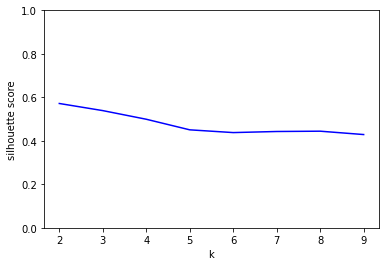

In [17]:
if k == k_values[0]:
        DataViz.plot_dendrogram(gyr_dataset, l)
DataViz.plot_xy(x=[k_values], y=[silhouette_values], xlabel='k', ylabel='silhouette score',
                ylim=[0, 1], line_styles=['b-'])

# Magnetic

In [4]:
mag_dataset = dataset.dropna(subset = ['mag_Magnetic field x (µT)', 'mag_Magnetic field y (µT)', 'mag_Magnetic field z (µT)'])
mag_dataset

,acc_Acceleration x (m/s^2),acc_Acceleration y (m/s^2),acc_Acceleration z (m/s^2),gyr_Gyroscope x (rad/s),gyr_Gyroscope y (rad/s),gyr_Gyroscope z (rad/s),lux_Illuminance (lx),loc_Latitude (°),loc_Longitude (°),loc_Velocity (m/s),mag_Magnetic field x (µT),mag_Magnetic field y (µT),mag_Magnetic field z (µT),labelbike,labeldance,labeldesk,labelrun,labelsit,labelwalki,labelwalko
2021-06-05 08:36:26.816535552,0.036547,-0.413988,9.933076,0.000925,0.001020,0.000860,NaN,52.334314,4.866964,0.0,-42.480555,-29.510528,-53.944618,0,0,1,0,0,0,0
2021-06-05 08:36:27.066535552,0.038458,-0.410600,9.926204,0.001178,0.000995,0.000796,NaN,NaN,NaN,NaN,-42.042138,-29.635504,-54.179348,0,0,1,0,0,0,0
2021-06-05 08:36:27.316535552,0.040394,-0.413093,9.926906,0.001111,0.000943,0.000502,NaN,NaN,NaN,NaN,-42.356174,-29.556420,-54.101409,0,0,1,0,0,0,0
2021-06-05 08:36:27.566535552,0.037950,-0.412318,9.926228,0.001102,0.000940,0.000633,NaN,NaN,NaN,NaN,-42.442798,-29.204040,-54.113833,0,0,1,0,0,0,0
2021-06-05 08:36:27.816535552,0.034974,-0.409512,9.931890,0.001243,0.001234,0.000796,NaN,NaN,NaN,NaN,-42.515800,-29.500013,-54.508421,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-05 09:54:09.316535552,-1.206271,-2.998419,-6.653096,-1.909578,-0.268146,0.427650,NaN,NaN,NaN,NaN,16.972640,28.263506,39.380895,1,0,0,0,0,0,0
2021-06-05 09:54:09.566535552,-0.339301,-3.701383,-6.518320,2.835989,0.443934,-0.038863,NaN,NaN,NaN,NaN,17.563350,31.381466,35.527515,1,0,0,0,0,0,0
2021-06-05 09:54:09.816535552,-0.247886,-11.119357,-8.390665,0.886565,-0.109226,0.003588,NaN,NaN,NaN,NaN,18.865706,39.960369,10.103960,1,0,0,0,0,0,0
2021-06-05 09:54:10.066535552,-0.393865,-8.937173,-7.247199,-2.348488,-0.453024,-0.030903,NaN,NaN,NaN,NaN,15.334604,35.668764,20.007892,1,0,0,0,0,0,0


## K-means

In [5]:
k_values = range(2, 10)
silhouette_values = []

for k in k_values:
    print(f'k = {k}')
    dataset_cluster = clusteringNH.k_means_over_instances(copy.deepcopy(
        mag_dataset), ['mag_Magnetic field x (µT)', 'mag_Magnetic field y (µT)', 'mag_Magnetic field z (µT)'], k, 'default', 20, 10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print(f'silhouette = {silhouette_score}')
    silhouette_values.append(silhouette_score)

k = 2
silhouette = 0.6288692889706664
k = 3
silhouette = 0.5992406141424882
k = 4
silhouette = 0.52483890488284
k = 5
silhouette = 0.5401601028335576
k = 6
silhouette = 0.5463688601672324
k = 7
silhouette = 0.5446513825291502
k = 8
silhouette = 0.5391144375026834
k = 9
silhouette = 0.5444752561631089


Figure saved to figures/figure_1.png


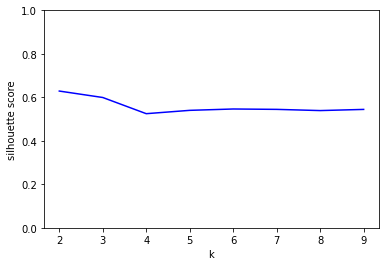

Highest K-Means silhouette score: k = 2


In [6]:
DataViz.plot_xy(x=[k_values], y=[silhouette_values], 
                xlabel='k', ylabel='silhouette score',ylim=[0, 1], line_styles=['b-'])
k = k_values[np.argmax(silhouette_values)]
print(f'Highest K-Means silhouette score: k = {k}')

## Kmediods

In [7]:
k_values = range(2, 10)
silhouette_values = []

for k in k_values:
    print(f'k = {k}')
    dataset_cluster = clusteringNH.k_medoids_over_instances(copy.deepcopy(
        mag_dataset), ['mag_Magnetic field x (µT)', 'mag_Magnetic field y (µT)', 'mag_Magnetic field z (µT)'], k, 'default', 20, n_inits=10)
    silhouette_score = dataset_cluster['silhouette'].mean()
    print(f'silhouette = {silhouette_score}')
    silhouette_values.append(silhouette_score)

k = 2
silhouette = 0.6278759066341555
k = 3
silhouette = 0.6102803689838909
k = 4
silhouette = 0.519493622488732
k = 5
silhouette = 0.5385078147123122
k = 6
silhouette = 0.5438669115477104
k = 7
silhouette = 0.5199232828050432
k = 8
silhouette = 0.5221167466595387
k = 9
silhouette = 0.5002293487930257


Figure saved to figures/figure_2.png


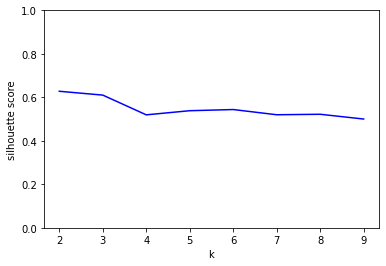

Highest K-Medoids silhouette score: k = 2
Figure saved to figures/figure_3.png


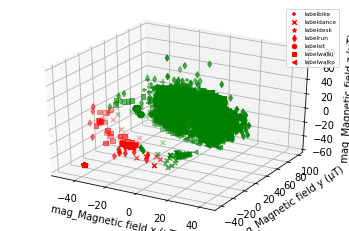

Figure saved to figures/figure_4.png


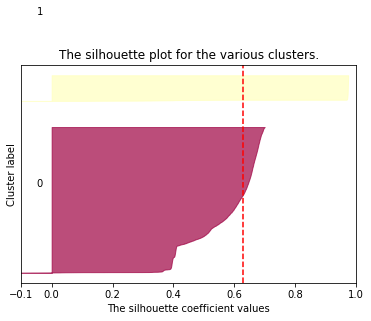

\multirow{2}{*}{ mag_Magnetic field x (µT) } & mean  &  -41.57 &  0.09\\
 & std  &  4.33 &  13.07\\
\multirow{2}{*}{ mag_Magnetic field y (µT) } & mean  &  -28.42 &  26.69\\
 & std  &  6.07 &  24.02\\
\multirow{2}{*}{ mag_Magnetic field z (µT) } & mean  &  -52.24 &  15.72\\
 & std  &  7.61 &  20.83\\
labelbike  & percentage  &  0.00 \% &  100.00 \%\\
labeldance  & percentage  &  0.92 \% &  99.08 \%\\
labeldesk  & percentage  &  100.00 \% &  0.00 \%\\
labelrun  & percentage  &  1.33 \% &  98.67 \%\\
labelsit  & percentage  &  0.00 \% &  100.00 \%\\
labelwalki  & percentage  &  2.91 \% &  97.09 \%\\
labelwalko  & percentage  &  0.00 \% &  100.00 \%\\


In [8]:
DataViz.plot_xy(x=[k_values], y=[silhouette_values], xlabel='k', ylabel='silhouette score',
                ylim=[0, 1], line_styles=['b-'])

k = k_values[np.argmax(silhouette_values)]
print(f'Highest K-Medoids silhouette score: k = {k}')

dataset_kmed = clusteringNH.k_medoids_over_instances(copy.deepcopy(mag_dataset), 
                                                     ['mag_Magnetic field x (µT)', 'mag_Magnetic field y (µT)', 'mag_Magnetic field z (µT)'], 
                                                     k, 'default', 20, n_inits=50)
DataViz.plot_clusters_3d(dataset_kmed, ['mag_Magnetic field x (µT)', 'mag_Magnetic field y (µT)', 'mag_Magnetic field z (µT)'], 'cluster', ['label'])
DataViz.plot_silhouette(dataset_kmed, 'cluster', 'silhouette')
util.print_latex_statistics_clusters(dataset_kmed, 'cluster', 
                                     ['mag_Magnetic field x (µT)', 'mag_Magnetic field y (µT)', 'mag_Magnetic field z (µT)'], 'label')

## hierarchical

In [9]:
k_values = range(2, 10)
silhouette_values = []

for k in k_values:
    print(f'k = {k}')
    dataset_cluster, l = clusteringH.agglomerative_over_instances(mag_dataset, 
                                                          ['mag_Magnetic field x (µT)', 'mag_Magnetic field y (µT)', 'mag_Magnetic field z (µT)'], 
                                                          k, 'euclidean', 
                                                          link_function='ward')
    silhouette_score = dataset_cluster['silhouette'].mean()
    print(f'silhouette = {silhouette_score}')
    silhouette_values.append(silhouette_score)

k = 2


/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster'] = cluster_assignment
/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['silhouette'] = silhouette_per_inst


silhouette = 0.620714401684561
k = 3


/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster'] = cluster_assignment
/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['silhouette'] = silhouette_per_inst


silhouette = 0.5354651265991487
k = 4


/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster'] = cluster_assignment
/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['silhouette'] = silhouette_per_inst


silhouette = 0.5462859358257823
k = 5


/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster'] = cluster_assignment
/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['silhouette'] = silhouette_per_inst


silhouette = 0.5283019147872114
k = 6


/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster'] = cluster_assignment
/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['silhouette'] = silhouette_per_inst


silhouette = 0.5243975441034956
k = 7


/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster'] = cluster_assignment
/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['silhouette'] = silhouette_per_inst


silhouette = 0.5158294934618038
k = 8


/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster'] = cluster_assignment
/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['silhouette'] = silhouette_per_inst


silhouette = 0.5247087334622262
k = 9


/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster'] = cluster_assignment


silhouette = 0.5173855958664999


/home/udy/Documents/University/Year1P6/MLFQS/Code/ML4QS/assignment02/Chapter5/Clustering.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['silhouette'] = silhouette_per_inst


Figure saved to figures/figure_5.png


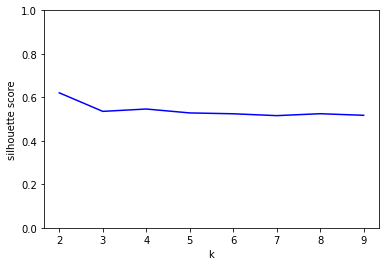

In [10]:
if k == k_values[0]:
        DataViz.plot_dendrogram(mag_dataset, l)
DataViz.plot_xy(x=[k_values], y=[silhouette_values], xlabel='k', ylabel='silhouette score',
                ylim=[0, 1], line_styles=['b-'])